# Geospatial Data Analysis Lab: Steel Plants Dataset


**(15/10/2025) Learning Objectives:**
- Perform exploratory data analysis (EDA) on geospatial datasets
- Visualize geospatial data using interactive maps with Plotly
- Merge environmental data with asset locations
- Aggregate data at the company level
- Integrate geospatial visualizations into a Streamlit dashboard

---


## Part 1: Setup and Data Loading

Import the necessary libraries and load the steel plants dataset.


In [205]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [175]:
# Load the steel plants dataset
df_1 = pd.read_excel('steel_plants.xlsx', sheet_name='Plant data')
df_1.to_csv('steel_plants.csv', index=False)
df_1 = pd.read_csv('steel_plants.csv')

In [176]:
df_2 = pd.read_excel('steel_plants.xlsx', sheet_name='Plant capacities and status')
df_2.to_csv('steel_plants_capacity.csv', index=False)
df_2 = pd.read_csv('steel_plants_capacity.csv')

In [177]:
steel_plants = pd.merge(df_1, df_2, on='Plant ID')
steel_plants = steel_plants[steel_plants['Status'] == 'operating']
steel_plants.head()

,Plant ID,Plant name (English)_x,Plant name (other language)_x,Other plant names (English),Other plant names (other language),Owner,Owner (other language),Owner GEM ID,Owner PermID,SOE Status,...,Start date_y,Nominal crude steel capacity (ttpa),Nominal BOF steel capacity (ttpa),Nominal EAF steel capacity (ttpa),Nominal OHF steel capacity (ttpa),Other/unspecified steel capacity (ttpa),Nominal iron capacity (ttpa),Nominal BF capacity (ttpa),Nominal DRI capacity (ttpa),Other/unspecified iron capacity (ttpa)
1,P100000120439,Algerian Qatari Steel Jijel plant,الجزائرية القطرية للصلب,AQS,NaN,Algerian Qatari Steel,NaN,E100001000957,5076384326,Partial,...,2017,2200,NaN,2200,NaN,NaN,2500,NaN,2500,NaN
4,P100000121198,Ozmert Algeria steel plant,NaN,NaN,NaN,Ozmert Algeria SARL,NaN,E100001012196,unknown,NaN,...,unknown,800,NaN,800,NaN,NaN,500,NaN,500,NaN
5,P100000120440,Sider El Hadjar Annaba steel plant,مركب الحجار للحديد والصلب,"ArcelorMittal Annaba (predecessor), El Hadjar ...",NaN,Groupe Industriel Sider SpA,NaN,E100001000960,5000941519,Full,...,1969,2150,350.0,1800,NaN,NaN,1500,1500,NaN,NaN
7,P100000120441,Tosyali Algerie Oran steel plant,شركة توسيالي الجزائرية التركية للحديد والصلب,NaN,Tosyali Algérie,Tosyali Ironsteel Industry Algerie SpA,NaN,E100000131071,5074196906,NaN,...,2013,6200,NaN,6200,NaN,NaN,5000,NaN,5000,NaN
8,P100000120005,Aceria Angola Bengo steel plant,NaN,ADA Steel,NaN,Ada - Aceria De Angola SA,NaN,E100000131097,unknown,NaN,...,2015,500,NaN,NaN,NaN,500,NaN,NaN,NaN,NaN


In [178]:
steel_plants[['lat','lon']] = steel_plants['Coordinates'].str.split(',', expand=True)
steel_plants.drop(columns=['Coordinates'], inplace=True)

steel_plants['lat'] = pd.to_numeric(steel_plants['lat'], errors='coerce')
steel_plants['lon'] = pd.to_numeric(steel_plants['lon'], errors='coerce')

In [179]:
steel_plants['Plant age (years)'] = pd.to_numeric(steel_plants['Plant age (years)'], errors='coerce')

In [180]:
steel_plants['Nominal crude steel capacity (ttpa)'] = pd.to_numeric(
    steel_plants['Nominal crude steel capacity (ttpa)'].astype(str).str.replace('[<>]', '', regex=True), 
    errors='coerce').fillna(0)

---
## Part 2: Exploratory Data Analysis (15 minutes)

Answer the following questions through your analysis:


### Question 1: Data Overview
**Task:** Display basic information about the dataset.
- How many steel plants are in the dataset?
- What are the column names and data types?
- Are there any missing values?


In [181]:
# Display dataset shape
steel_plants.shape

(868, 59)

In [182]:
# Display column information and data types
steel_plants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 868 entries, 1 to 1742
Data columns (total 59 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Plant ID                                 868 non-null    object 
 1   Plant name (English)_x                   868 non-null    object 
 2   Plant name (other language)_x            533 non-null    object 
 3   Other plant names (English)              549 non-null    object 
 4   Other plant names (other language)       222 non-null    object 
 5   Owner                                    868 non-null    object 
 6   Owner (other language)                   411 non-null    object 
 7   Owner GEM ID                             868 non-null    object 
 8   Owner PermID                             868 non-null    object 
 9   SOE Status                               148 non-null    object 
 10  Parent                                   868 non-null 

In [183]:
# Check for missing values
steel_plants.isnull().sum()

Plant ID                                     0
Plant name (English)_x                       0
Plant name (other language)_x              335
Other plant names (English)                319
Other plant names (other language)         646
Owner                                        0
Owner (other language)                     457
Owner GEM ID                                 0
Owner PermID                                 0
SOE Status                                 720
Parent                                       0
Parent GEM ID                                0
Parent PermID                                0
Location address                             0
Municipality                                 0
Subnational unit (province/state)            0
Country/Area_x                               0
Region                                       0
Other language location address            545
Coordinate accuracy                          0
GEM wiki page                                0
Plant age (ye

### Question 2: Statistical Summary
**Task:** Generate descriptive statistics for numerical columns.
- What is the average plant capacity?
- What is the range of latitudes and longitudes?
- What is the distribution of plant ages?


In [184]:
# Average capacity plant capacity
print("Average capacity plant capacity:", steel_plants['Nominal crude steel capacity (ttpa)'].mean())

Average capacity plant capacity: 2309.4660368663594


In [185]:
# Range of lat and lon
print("Lat range:", steel_plants['lat'].min(), steel_plants['lat'].max())
print("Lon range:", steel_plants['lon'].min(), steel_plants['lon'].max())

Lat range: -37.831379 66.311519
Lon range: -123.163599 174.728098


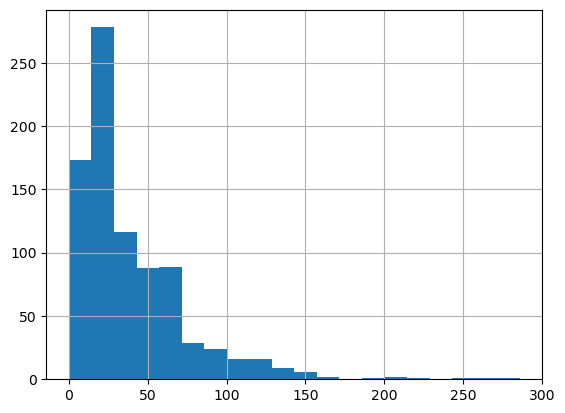

In [212]:
# Distribution od plant age without label
steel_plants['Plant age (years)'].hist(bins=20)
plt.show()

### Question 3: Geographic Distribution
**Task:** Analyze the geographic distribution of steel plants.
- Which countries/regions have the most steel plants?
- What is the distribution of plants by company?


In [221]:
# Count plants by country
print(steel_plants['Country/Area_x'].value_counts())

Country/Area_x
China              289
India               74
United States       70
Japan               38
Iran                31
                  ... 
Namibia              1
New Zealand          1
Nigeria              1
North Macedonia      1
Zimbabwe             1
Name: count, Length: 80, dtype: int64


In [220]:
# Count plants by region
print(steel_plants['Region'].value_counts())

Region
Asia Pacific               497
Europe                     132
North America               91
Middle East                 51
Central & South America     37
Africa                      30
Eurasia                     30
Name: count, dtype: int64


In [219]:
# Count plants by company
print(steel_plants['Parent'].value_counts())

Parent
Nucor Corp [100.0%]                                                                                                                                                                                           17
ArcelorMittal SA [100.0%]                                                                                                                                                                                     15
Nippon Steel Corp [100.0%]                                                                                                                                                                                    14
Cleveland-Cliffs Inc [100.0%]                                                                                                                                                                                 10
Commercial Metals Co [100.0%]                                                                                                                                

### Question 4: Capacity Analysis
**Task:** Analyze the capacity distribution.
- What is the total global steel production capacity?
- Which companies have the highest total capacity?
- How does capacity vary by region?


In [217]:
# Calculate total capacity
print("Total capacity:", steel_plants['Nominal crude steel capacity (ttpa)'].sum())

Total capacity: 2004616.52


In [218]:
# Group by company and sum capacity
print(steel_plants.groupby('Parent')['Nominal crude steel capacity (ttpa)'].sum().sort_values(ascending=False))

Parent
Nippon Steel Corp [100.0%]                                                                             54783.0
POSCO Holdings Inc [100.0%]                                                                            41700.0
Baoshan Iron & Steel Co Ltd [100.0%]                                                                   35707.0
JSW Steel Ltd [100.0%]                                                                                 33159.0
ArcelorMittal SA [100.0%]                                                                              31001.0
                                                                                                        ...   
WISCO Group Kunming Steel Co Ltd [100.0%]                                                                  0.0
Wuxi Xinsanzhou Special Steel Co Ltd [100.0%]                                                              0.0
China Baowu Steel Group Co Ltd [48.4%]; Kunming Iron & Steel Holding Co Ltd [40.3%]; unknown [4.2%]      

---
## Part 3: Geospatial Visualization with Plotly (15 minutes)

Create interactive maps to visualize the steel plants' locations and characteristics.


### Exercise 1: Basic Scatter Map
**Task:** Create a scatter map showing all steel plant locations.
- Use latitude and longitude for positioning
- Color points by country or region
- Add hover information showing plant name, company, and capacity


In [228]:
# Create a scatter_geo or scatter_mapbox plot
# Hint: Use plotly.express.scatter_geo() or scatter_mapbox()

### Exercise 2: Sized Markers by Capacity
**Task:** Create a map where marker size represents plant capacity.
- Larger markers for higher capacity plants
- Color by company
- Include interactive hover details


In [193]:
# Create scatter map with size parameter based on capacity



### Exercise 3: Density Heatmap
**Task:** Create a density map showing concentration of steel plants.
- Use Plotly's density_mapbox to show clustering
- Identify regions with high plant density


In [194]:
# Create density heatmap
# Hint: Use plotly.express.density_mapbox()



---
## Part 4: Merging Environmental Data with Assets

Integrate environmental data (e.g., air quality, emissions, proximity to water sources) with steel plant locations.


### Exercise 1: Load Environmental Data
**Task:** Load the environmental dataset and inspect it.

- [Litpop database](https://www.research-collection.ethz.ch/entities/researchdata/12dcfc4f-9d03-463a-8d6b-76c0dc73cdc8)

- Expected columns: location_id, latitude, longitude, population density, activity etc.


In [195]:
# Load environmental data



In [196]:
# Inspect environmental data



### Exercise 2: Spatial Join or Nearest Neighbor Matching
**Task:** Merge environmental data with steel plants based on geographic proximity.
- Use nearest neighbor matching or spatial join
- Consider using geopandas for distance calculations
- Match each plant to the nearest environmental monitoring station


In [197]:
# Calculate distances or perform spatial join
# Hint: You might calculate haversine distance or use a spatial library



In [198]:
# Merge datasets



### Exercise 3: Visualize Merged Data
**Task:** Create a map showing steel plants colored by environmental metrics.
- Color plants by air quality index or other environmental indicators
- Size by capacity
- Add hover details with both plant and environmental information


In [199]:
# Create visualization of merged data



---
## Part 5: Company-Level Aggregation

Aggregate data at the company level to analyze corporate footprints.


### Exercise 1: Aggregate Metrics by Company
**Task:** Group plants by company and calculate aggregate metrics.
- Total capacity per company
- Number of plants per company
- Average environmental metrics per company
- Geographic spread (e.g., number of countries)


In [200]:
# Group by company and aggregate



### Exercise 2: Company Headquarters or Centroid
**Task:** Calculate a representative location for each company.
- Option 1: Use the centroid of all plant locations
- Option 2: Use the location of the largest plant
- Option 3: Assign actual headquarters coordinates


In [201]:
# Calculate company representative locations



### Exercise 3: Visualize Company-Level Data
**Task:** Create a map showing companies with aggregated metrics.
- Show one marker per company at the representative location
- Size by total capacity
- Color by average environmental impact
- Hover information with company summary statistics


In [202]:
# Create company-level visualization



---
## Part 6: Streamlit Dashboard Integration

Prepare your visualizations for deployment in a Streamlit dashboard.


### Exercise 1: Create Dashboard Script Structure
**Task:** Create a Streamlit app file (`dashboard.py`) with the following structure:

```python
# Import streamlit and other necessary libraries

# Set page configuration

# Title and description

# Sidebar for filters
# - Company selector
# - Region/country filter
# - Capacity range slider

# Main content area
# - KPI metrics (total plants, total capacity, etc.)
# - Interactive map
# - Data table

# Footer with data sources and notes
```


### Exercise 1: Prepare Data for Dashboard
**Task:** Save your processed data to files that the dashboard will load.
- Export cleaned plant data
- Export merged environmental data
- Export company-level aggregations
- Save as CSV or Parquet for efficient loading


In [203]:
# Save processed datasets



### Exercise 2: Display relevant information from your exploratory analysis into the dashboard

In [204]:
# This cell is for notes/observations about your dashboard
# What works well?
# What could be improved?
# Any performance issues with large datasets?



---
## Lab Summary and Key Takeaways

**What you learned:**
- How to perform EDA on geospatial datasets
- Creating interactive maps with Plotly for geospatial data
- Merging spatial datasets based on geographic proximity
- Aggregating geospatial data at different levels (asset vs. company)
- Building interactive dashboards with Streamlit

**Next Steps:**
- Explore other geospatial libraries (GeoPandas, Folium, Kepler.gl)
- Learn about coordinate reference systems (CRS) and projections
- Practice with other datasets (buildings, utilities, transportation)
- Deploy your dashboard to Streamlit Cloud or other hosting services
